In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
!apt-get update -qq
!apt-get install -qq -y fonts-nanum
!fc-cache -fv
!rm -rf ~/.cache/matplotlib


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire

In [3]:
import chardet

# 파일 업로드
from google.colab import files
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# 파일 인코딩 확인
with open(file_name, "rb") as f:
    rawdata = f.read(10000)
    encoding_detected = chardet.detect(rawdata)['encoding']
print(f"Detected Encoding: {encoding_detected}")

# 인코딩을 사용해 데이터 로드
df = pd.read_csv(file_name, encoding=encoding_detected)

# 데이터 미리보기
df.head()


Saving 한국교통안전공단_자동차결함 리콜현황_20231231.csv to 한국교통안전공단_자동차결함 리콜현황_20231231 (6).csv
Detected Encoding: EUC-KR


,제작자,차명,생산기간(부터),생산기간(까지),리콜개시일,리콜사유
0,현대자동차(주),포터2 (HR),2023-03-07,2023-03-08,2023-04-10,현대자동차㈜에서는 포터2(HR) 일부 차량에서 변속 케이블 브라켓 체결 작업 불량으...
1,비엠더블유코리아(주),M240i xDrive Coupe,2023-03-14,2023-03-29,2023-04-26,무선 충전용 트레이 장치의 소프트웨어 오류로 디지털 키 사용 시 시동을 끈 상태에서...
2,비엠더블유코리아(주),iX3 M Sport,2023-03-27,2023-04-07,2023-04-26,무선 충전용 트레이 장치의 소프트웨어 오류로 디지털 키 사용 시 시동을 끈 상태에서...
3,메르세데스벤츠코리아(주),Maybach S 580 4MATIC,2020-09-11,2020-10-28,2023-05-12,개발 공정 오류로 인하여 전방 차체 벽면 실링의 수밀성이 부족할 수 있어 비가 많이...
4,메르세데스벤츠코리아(주),S 580 4MATIC,2020-07-09,2020-07-09,2023-05-12,개발 공정 오류로 인하여 전방 차체 벽면 실링의 수밀성이 부족할 수 있어 비가 많이...


In [14]:
#결측치 확인
print(df.isna().sum())

#중복값 확인
df[df.duplicated(keep=False)]
print("Before: ", len(df))
df = df.drop_duplicates()
print("After: ", len(df))

제작자         0
차명          0
생산기간(부터)    0
생산기간(까지)    0
리콜개시일       0
리콜사유        0
리콜년도        0
리콜월         0
dtype: int64
Before:  941
After:  941


In [4]:
# 데이터 구조 확인
print(df.info())
print(df.head())

# 날짜 데이터 변환
df['리콜개시일'] = pd.to_datetime(df['리콜개시일'], errors='coerce')
df['리콜년도'] = df['리콜개시일'].dt.year

# 결측치 확인
print(df.isnull().sum())

# 필요 없는 열 삭제 (예: 생산기간, 기타 설명 등)
df_cleaned = df.drop(columns=['생산기간(부터)', '생산기간(까지)'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제작자       941 non-null    object
 1   차명        941 non-null    object
 2   생산기간(부터)  941 non-null    object
 3   생산기간(까지)  941 non-null    object
 4   리콜개시일     941 non-null    object
 5   리콜사유      941 non-null    object
dtypes: object(6)
memory usage: 44.2+ KB
None
             제작자                    차명    생산기간(부터)    생산기간(까지)       리콜개시일  \
0       현대자동차(주)              포터2 (HR)  2023-03-07  2023-03-08  2023-04-10   
1    비엠더블유코리아(주)    M240i xDrive Coupe  2023-03-14  2023-03-29  2023-04-26   
2    비엠더블유코리아(주)           iX3 M Sport  2023-03-27  2023-04-07  2023-04-26   
3  메르세데스벤츠코리아(주)  Maybach S 580 4MATIC  2020-09-11  2020-10-28  2023-05-12   
4  메르세데스벤츠코리아(주)          S 580 4MATIC  2020-07-09  2020-07-09  2023-05-12   

                                                리콜사유  
0  현대자동차㈜에서는 포터2(HR) 일

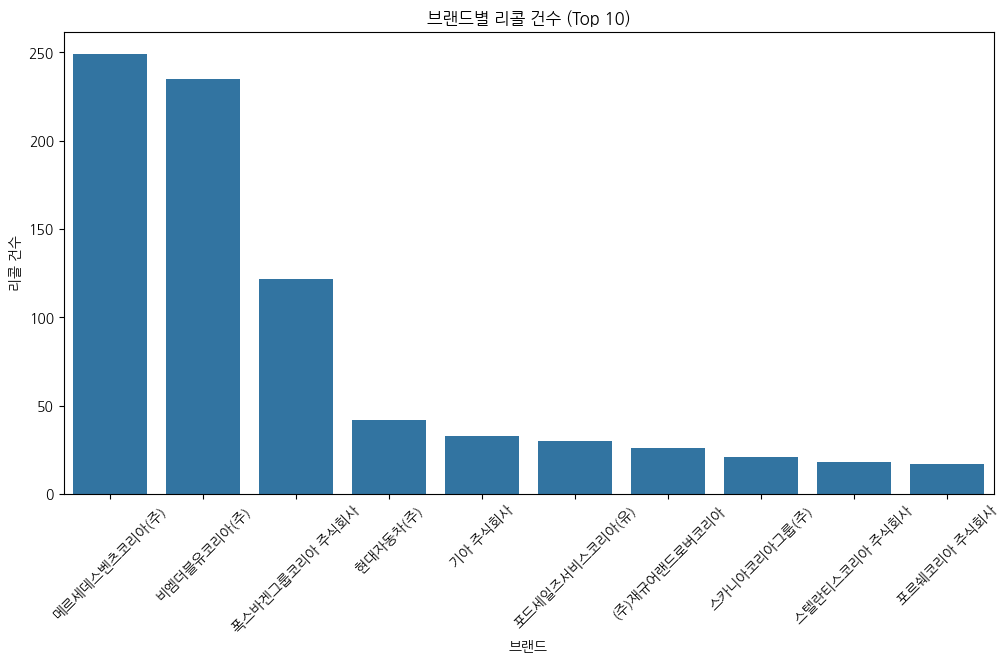

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
# '제작자'별 리콜 건수 계산
recall_by_brand = df['제작자'].value_counts()

# 한글 폰트 설정
plt.rc('font', family='NanumGothic')  # 또는 'NanumBarunGothic' 사용 가능
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 그래프 다시 그리기
plt.figure(figsize=(12, 6))
sns.barplot(x=recall_by_brand.index[:10], y=recall_by_brand.values[:10])
plt.xticks(rotation=45)
plt.xlabel("브랜드")
plt.ylabel("리콜 건수")
plt.title("브랜드별 리콜 건수 (Top 10)")
plt.show()


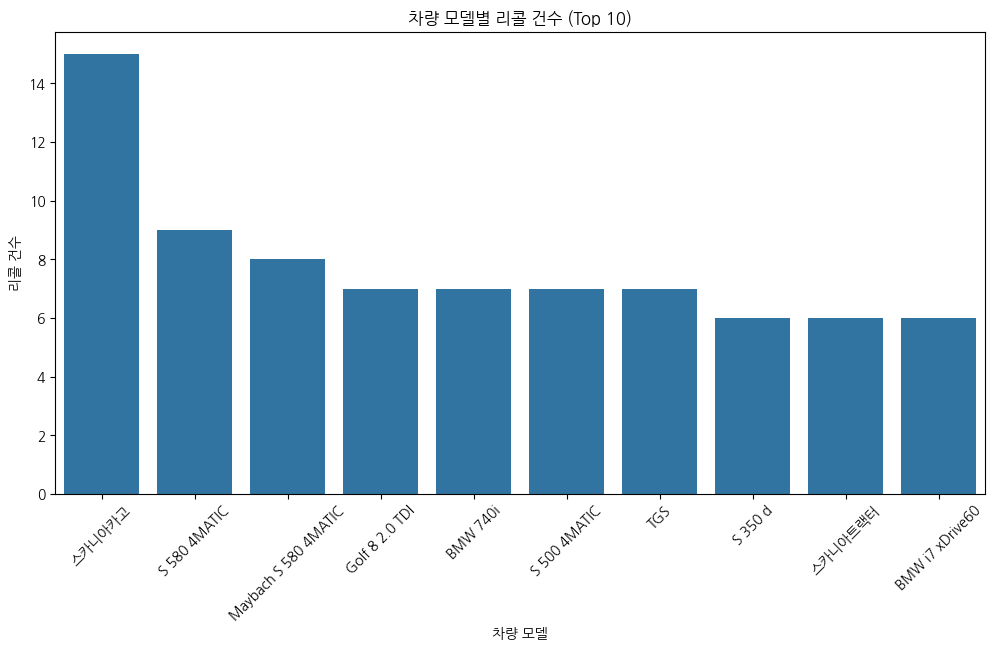

In [7]:
recall_by_model = df_cleaned['차명'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=recall_by_model.index[:10], y=recall_by_model.values[:10])
plt.xticks(rotation=45)
plt.xlabel("차량 모델")
plt.ylabel("리콜 건수")
plt.title("차량 모델별 리콜 건수 (Top 10)")
plt.show()


In [10]:
# '리콜개시일'을 날짜 형식으로 변환
df['리콜개시일'] = pd.to_datetime(df['리콜개시일'], errors='coerce')

# '리콜년도' 및 '리콜월' 추가
df['리콜년도'] = df['리콜개시일'].dt.year
df['리콜월'] = df['리콜개시일'].dt.month

# 2023년 데이터 필터링
df_2023 = df[df['리콜년도'] == 2023].copy()


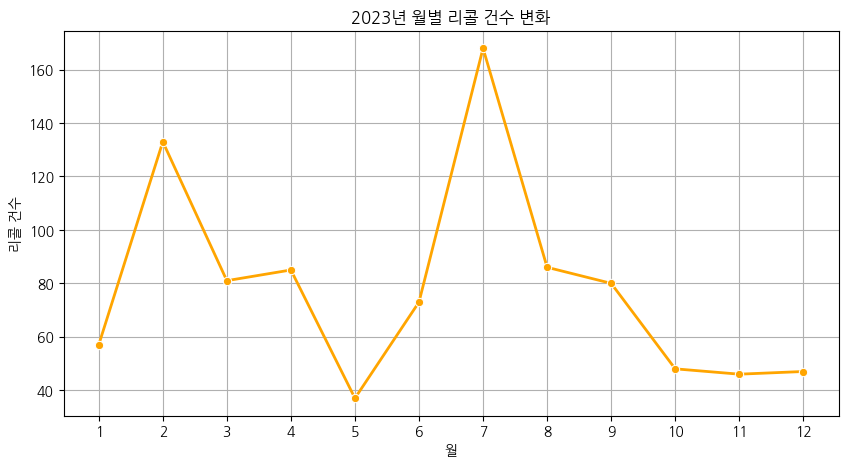

In [11]:
# 월별 리콜 건수 집계
recall_by_month = df_2023['리콜월'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(10, 5))
sns.lineplot(x=recall_by_month.index, y=recall_by_month.values, marker='o', color="orange", linewidth=2)

# 그래프 설정
plt.xticks(range(1, 13))  # 1월~12월까지 표시
plt.xlabel("월")
plt.ylabel("리콜 건수")
plt.title("2023년 월별 리콜 건수 변화")
plt.grid(True)  # 배경 격자 추가
plt.show()


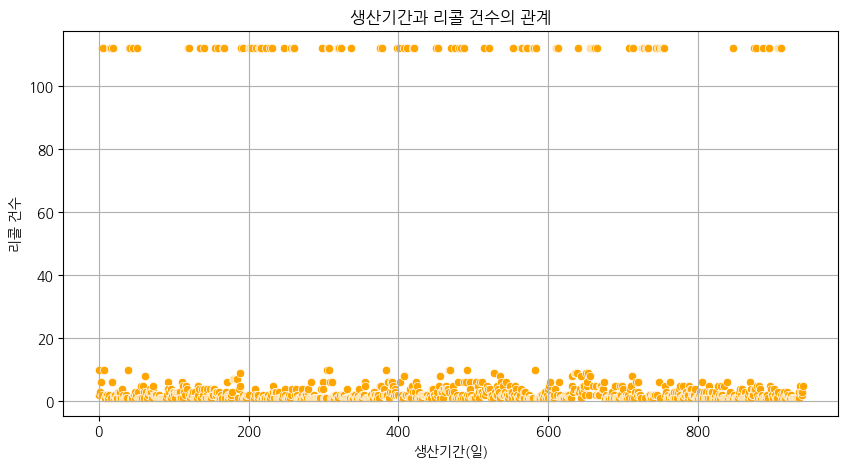

생산기간과 리콜 건수의 상관계수: -0.311413413456314


<ipython-input-15-093bd5684963>:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  recall_by_category = df.groupby('생산기간 범위').size()


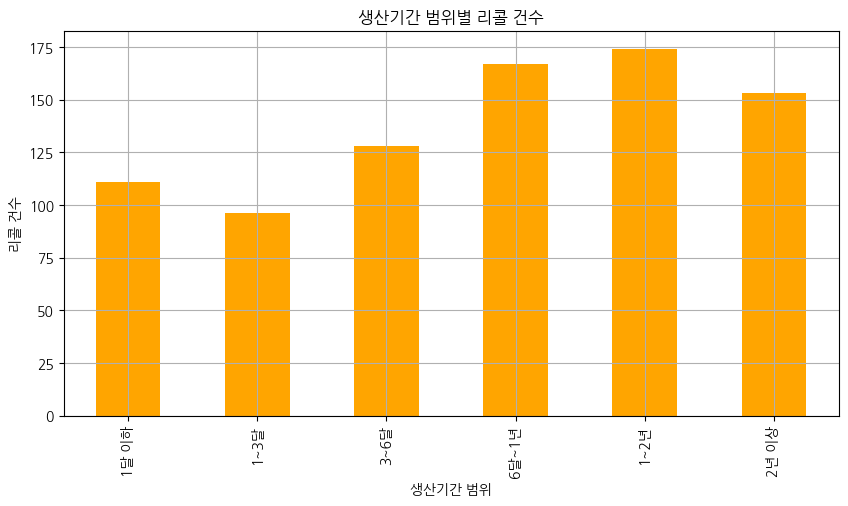

회귀 계수 (기울기): -0.0021876857365424633
절편: 16.54255873613245


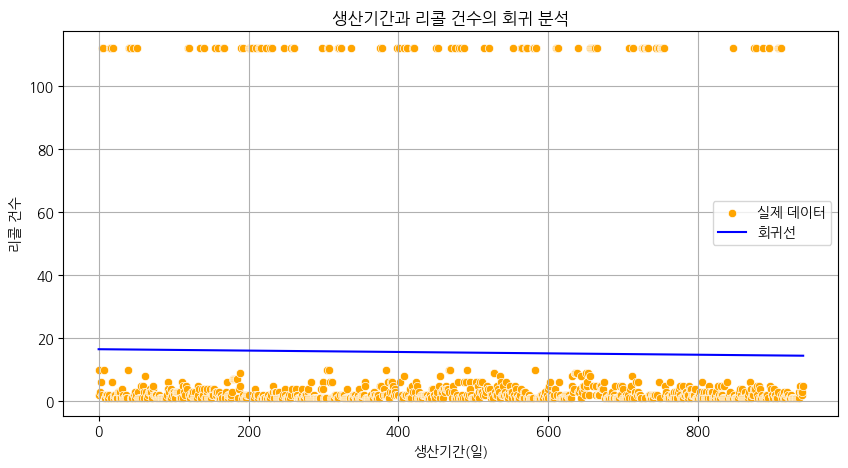

In [15]:
# 필요한 라이브러리 불러오기
import numpy as np
from sklearn.linear_model import LinearRegression

# 1️⃣ '생산기간(부터)' 및 '생산기간(까지)'을 날짜 형식으로 변환
df['생산기간(부터)'] = pd.to_datetime(df['생산기간(부터)'], errors='coerce')
df['생산기간(까지)'] = pd.to_datetime(df['생산기간(까지)'], errors='coerce')

# 2️⃣ 생산기간 계산 (일 단위)
df['생산기간(일)'] = (df['생산기간(까지)'] - df['생산기간(부터)']).dt.days

# 3️⃣ 생산기간과 리콜 건수의 상관관계 분석
correlation = df[['생산기간(일)']].join(df.groupby('생산기간(일)').size().rename('리콜 건수'), on='생산기간(일)')

# NaN 값 제거
correlation.dropna(inplace=True)

# 4️⃣ 산점도 그래프 시각화
plt.figure(figsize=(10, 5))
sns.scatterplot(x=correlation.index, y=correlation['리콜 건수'], color='orange')
plt.xlabel("생산기간(일)")
plt.ylabel("리콜 건수")
plt.title("생산기간과 리콜 건수의 관계")
plt.grid(True)
plt.show()

# 5️⃣ 상관계수 계산
correlation_coefficient = correlation.corr().iloc[0, 1]
print(f"생산기간과 리콜 건수의 상관계수: {correlation_coefficient}")

# 6️⃣ 생산기간 범주화
bins = [0, 30, 90, 180, 365, 730, df['생산기간(일)'].max()]
labels = ['1달 이하', '1~3달', '3~6달', '6달~1년', '1~2년', '2년 이상']
df['생산기간 범위'] = pd.cut(df['생산기간(일)'], bins=bins, labels=labels)

# 각 범주별 평균 리콜 건수
recall_by_category = df.groupby('생산기간 범위').size()

# 7️⃣ 범주화된 데이터 시각화
plt.figure(figsize=(10, 5))
recall_by_category.plot(kind='bar', color='orange')
plt.xlabel("생산기간 범위")
plt.ylabel("리콜 건수")
plt.title("생산기간 범위별 리콜 건수")
plt.grid(True)
plt.show()

# 8️⃣ 선형 회귀 분석 (생산기간 vs 리콜 건수)
X = correlation.index.values.reshape(-1, 1)  # 생산기간(일)
y = correlation['리콜 건수'].values  # 리콜 건수

model = LinearRegression()
model.fit(X, y)

# 회귀 계수 출력
print(f"회귀 계수 (기울기): {model.coef_[0]}")
print(f"절편: {model.intercept_}")

# 9️⃣ 회귀선 시각화
plt.figure(figsize=(10, 5))
sns.scatterplot(x=correlation.index, y=correlation['리콜 건수'], color='orange', label='실제 데이터')
plt.plot(correlation.index, model.predict(X), color='blue', label='회귀선')
plt.xlabel("생산기간(일)")
plt.ylabel("리콜 건수")
plt.title("생산기간과 리콜 건수의 회귀 분석")
plt.legend()
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

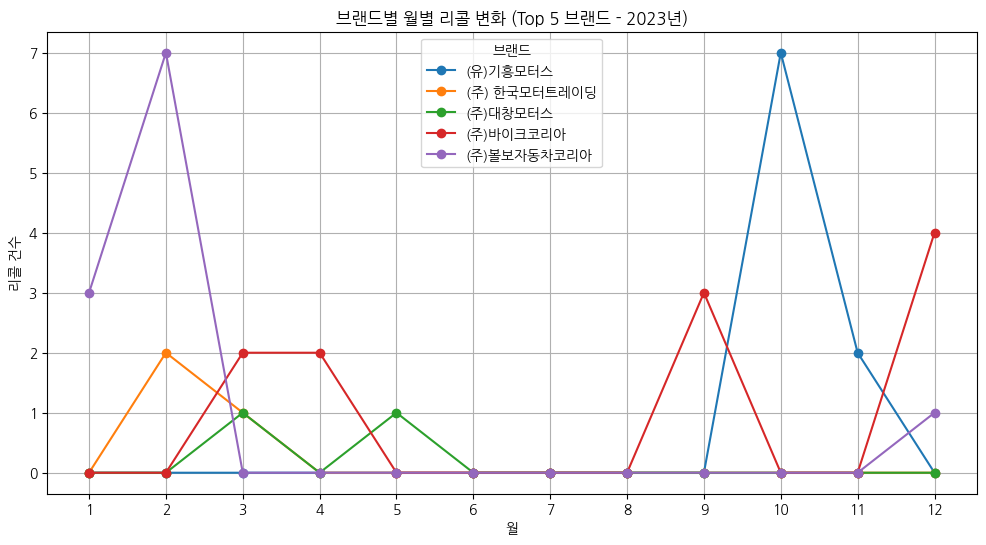

In [16]:
# 1️⃣ 2023년 데이터 필터링
df_2023 = df[df['리콜년도'] == 2023].copy()

# 2️⃣ '리콜월' 열 추가
df_2023['리콜월'] = df_2023['리콜개시일'].dt.month

# 3️⃣ 브랜드별 월별 리콜 건수 집계
brand_monthly_recall = df_2023.groupby(['리콜월', '제작자']).size().unstack().fillna(0)

# 4️⃣ 시각화 (Top 5 브랜드)
plt.figure(figsize=(12, 6))
brand_monthly_recall.T.iloc[:5].T.plot(marker='o', figsize=(12, 6))
plt.xticks(range(1, 13))  # 1월~12월까지 표시
plt.xlabel("월")
plt.ylabel("리콜 건수")
plt.title("브랜드별 월별 리콜 변화 (Top 5 브랜드 - 2023년)")
plt.legend(title="브랜드")
plt.grid(True)
plt.show()


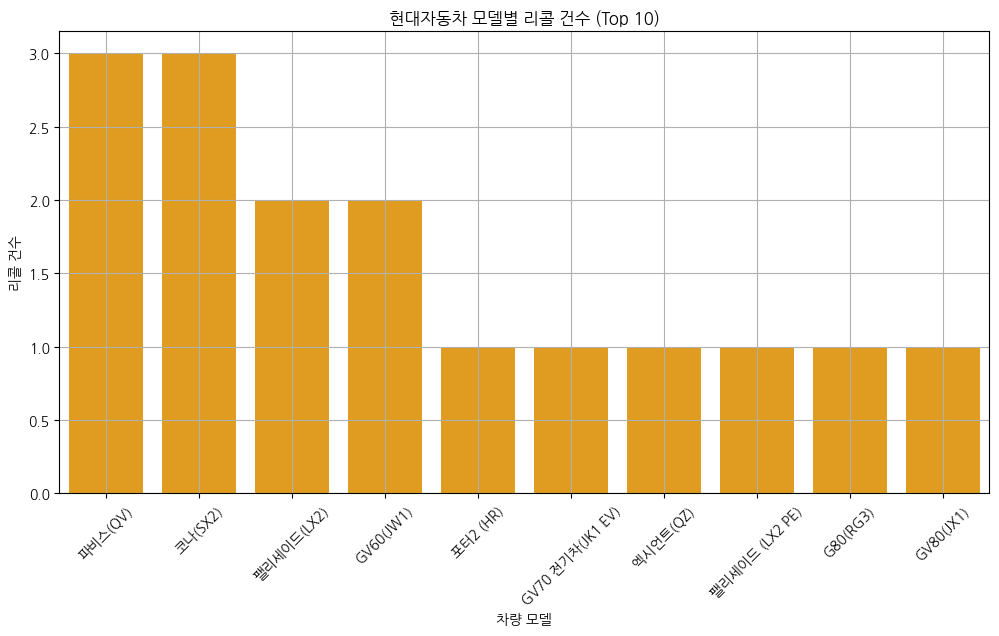

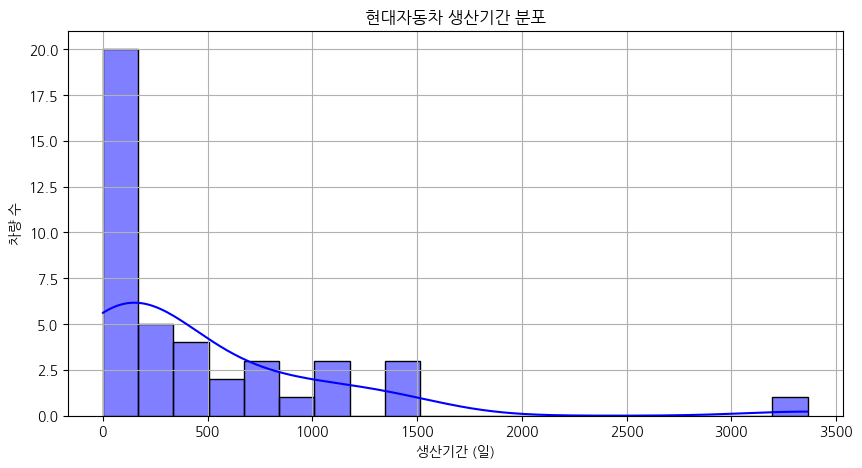

,차명,생산기간(일),리콜개시일,리콜사유
161,뉴 카운티(CS) 11인승 리무진,3364,2023-09-27,뉴-카운티(CS)11인승 리무진 차량의 제조불량으로 접이식 좌석에 안전띠가 조립되지...
559,파비스(QV),1442,2023-05-22,"현대자동차(주)에서는 파비스(QV), 엑시언트(QZ) 일부 차량에서 배터리 컷오프 ..."
575,G80(RG3),1405,2023-06-30,"G80(RG3), GV80(JX1), GV70(JK1), GV60(JW1), GV..."
576,GV80(JX1),1356,2023-06-30,"G80(RG3), GV80(JX1), GV70(JK1), GV60(JW1), GV..."
712,엑시언트 수소전기트럭 (QZ FCEV),1168,2023-08-17,엑시언트 수소전기트럭(QZ FCEV) 일부 차량에서 제동용 에어탱크 브레이크 호스 ...
17,투싼(TL),1124,2023-08-31,일부 차량에서 스마트 정션박스의 소프트웨어 오류로 인해 좌측 방향지시등 작동 시 일...
578,GV70(JK1),1015,2023-06-30,"G80(RG3), GV80(JX1), GV70(JK1), GV60(JW1), GV..."
30,아반떼 하이브리드 (CN7 HEV),959,2023-09-11,현대자동차㈜에서는 아반떼 하이브리드(CN7 HEV) 일부 차량에서 하이브리드 통합 ...
558,엑시언트(QZ),774,2023-05-22,"현대자동차(주)에서는 파비스(QV), 엑시언트(QZ) 일부 차량에서 배터리 컷오프 ..."
225,아이오닉5 (NE),736,2023-02-23,현대자동차㈜에서는 아이오닉5(NE) 일부 차량에서 차량 제어장치(VCU) 로직 설계...


In [19]:
# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ 현대자동차 데이터 필터링
hyundai_df = df[df['제작자'] == '현대자동차(주)'].copy()

# 2️⃣ 현대자동차 모델별 리콜 건수 집계
hyundai_model_recall = hyundai_df['차명'].value_counts()

# 3️⃣ 현대자동차 모델별 리콜 건수 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=hyundai_model_recall.index[:10], y=hyundai_model_recall.values[:10], color='orange')
plt.xticks(rotation=45)
plt.xlabel("차량 모델")
plt.ylabel("리콜 건수")
plt.title("현대자동차 모델별 리콜 건수 (Top 10)")
plt.grid(True)
plt.show()

# 4️⃣ 현대자동차 생산기간 분석
hyundai_df['생산기간(일)'] = (hyundai_df['생산기간(까지)'] - hyundai_df['생산기간(부터)']).dt.days

# 5️⃣ 생산기간과 리콜 건수의 관계 분석
plt.figure(figsize=(10, 5))
sns.histplot(hyundai_df['생산기간(일)'].dropna(), bins=20, kde=True, color='blue')
plt.xlabel("생산기간 (일)")
plt.ylabel("차량 수")
plt.title("현대자동차 생산기간 분포")
plt.grid(True)
plt.show()

# 6️⃣ 현대자동차 리콜 상세 데이터 정리
hyundai_summary = hyundai_df[['차명', '생산기간(일)', '리콜개시일', '리콜사유']].sort_values(by='생산기간(일)', ascending=False)

# 📌 데이터 출력 (수정된 부분)
from IPython.display import display
display(hyundai_summary)


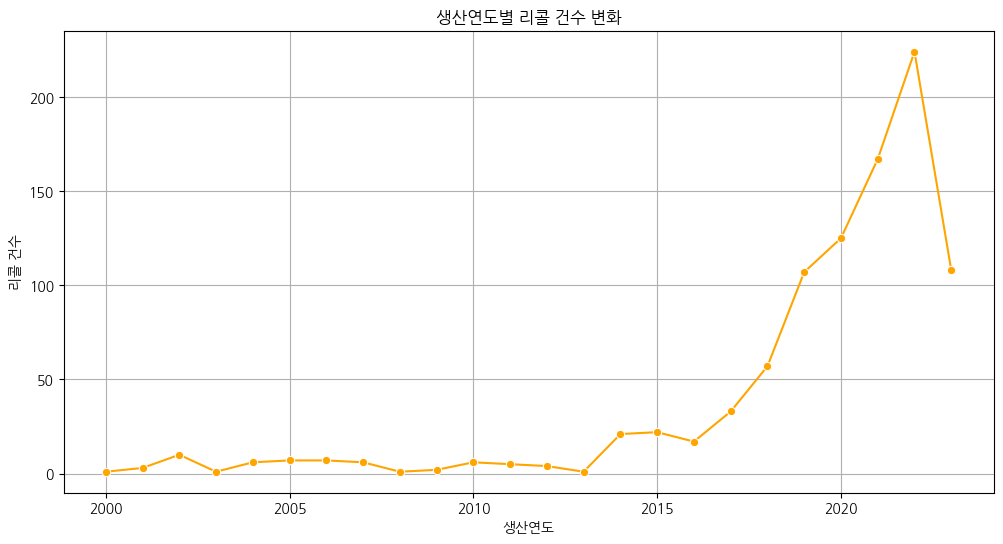

In [18]:
# 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ 생산연도(차량이 처음 생산된 연도) 추출
df['생산연도'] = df['생산기간(부터)'].dt.year

# 2️⃣ 생산연도별 리콜 건수 집계
recall_by_production_year = df.groupby('생산연도').size()

# 3️⃣ 생산연도별 리콜 건수 시각화 (꺾은선 그래프)
plt.figure(figsize=(12, 6))
sns.lineplot(x=recall_by_production_year.index, y=recall_by_production_year.values, marker='o', color='orange')
plt.xlabel("생산연도")
plt.ylabel("리콜 건수")
plt.title("생산연도별 리콜 건수 변화")
plt.grid(True)
plt.show()


In [20]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 21.2 MB/s eta 0:00:00


,단어,빈도
0,수,840
1,차량,702
2,오류로,522
3,가능성,369
4,자동차,364
...,...,...
95,인식,63
96,확인,62
97,벽면,62
98,향,61


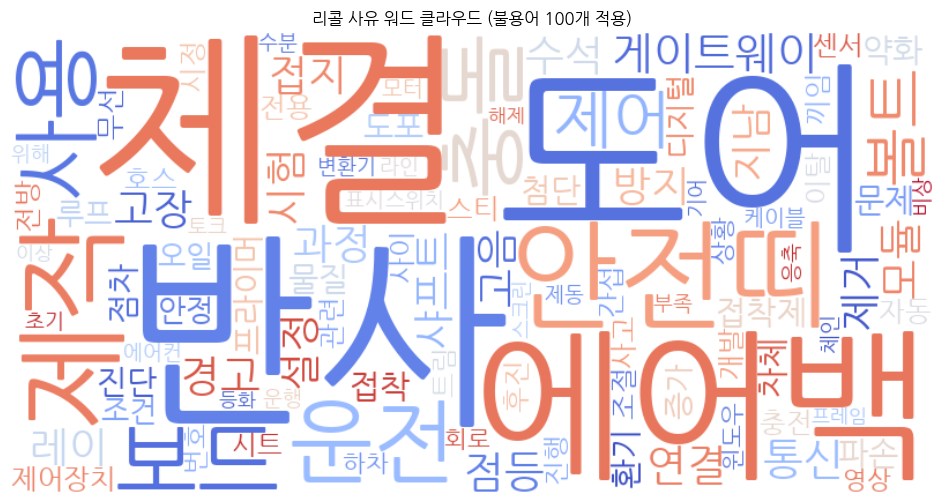

In [25]:
#1 불용어 100개 추출 코드
# 🔹 필요한 라이브러리 설치 (코랩에서 실행)
!pip install konlpy wordcloud

# 🔹 필요한 라이브러리 불러오기
from collections import Counter
from konlpy.tag import Okt
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 1️⃣ 리콜 사유 데이터 결합
text_data = ' '.join(df['리콜사유'].dropna())

# 2️⃣ 형태소 분석기 (Okt) 사용하여 명사 추출
okt = Okt()
tokens = okt.nouns(text_data)

# 3️⃣ 단어 빈도 분석
word_counts = Counter(tokens)

# 4️⃣ 상위 100개 단어 추출 (불용어 후보)
most_common_words = word_counts.most_common(100)

# 5️⃣ 데이터프레임 생성
stopwords_candidates_df = pd.DataFrame(most_common_words, columns=['단어', '빈도'])

# 6️⃣ 불용어 리스트 생성 (불용어 후보 100개)
stopwords_100 = set([word for word, _ in most_common_words])

# 7️⃣ 불용어 제거 후 단어 빈도 계산
filtered_tokens = [word for word in tokens if word not in stopwords_100 and len(word) > 1]
filtered_word_counts = Counter(filtered_tokens)

# 8️⃣ 워드 클라우드 생성 (불용어 100개 적용)
wordcloud = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # 한글 폰트 적용
    background_color='white',
    width=800,
    height=400,
    max_words=100,
    stopwords=stopwords_100,
    colormap='coolwarm'
).generate_from_frequencies(filtered_word_counts)

# 9️⃣ 데이터프레임 출력 (불용어 후보 100개)
from IPython.display import display
display(stopwords_candidates_df)

# 🔟 워드 클라우드 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("리콜 사유 워드 클라우드 (불용어 100개 적용)")
plt.show()

,단어,빈도
0,수,840
1,차량,702
2,오류로,522
3,가능성,369
4,자동차,364
...,...,...
195,번호,29
196,진행,29
197,트림,29
198,영상,28


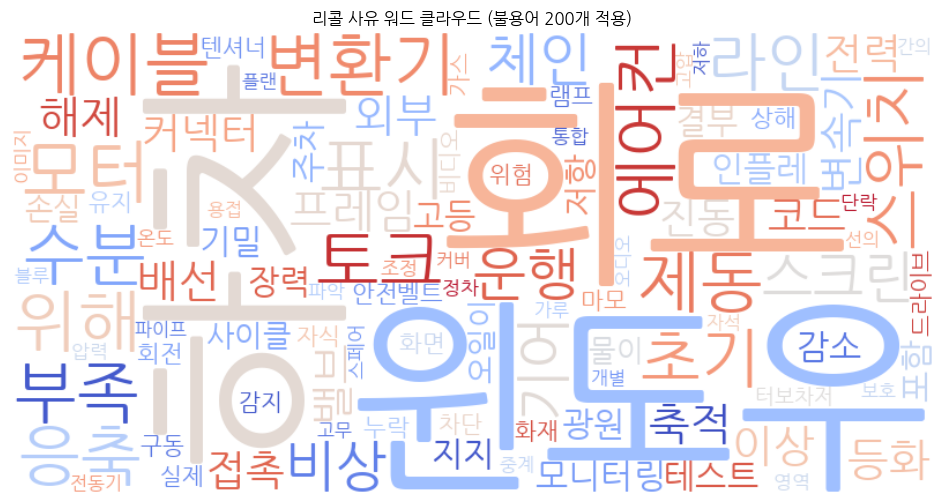

In [23]:
#2 리콜 사유에서 불용어 후보 200개 추출 코드
#🔹 필요한 라이브러리 설치 (코랩에서 실행)
!pip install konlpy wordcloud

# 🔹 필요한 라이브러리 불러오기
from collections import Counter
from konlpy.tag import Okt
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 1️⃣ 리콜 사유 데이터 결합
text_data = ' '.join(df['리콜사유'].dropna())

# 2️⃣ 형태소 분석기 (Okt) 사용하여 명사 추출
okt = Okt()
tokens = okt.nouns(text_data)

# 3️⃣ 단어 빈도 분석
word_counts = Counter(tokens)

# 4️⃣ 상위 200개 단어 추출 (불용어 후보)
most_common_words = word_counts.most_common(200)

# 5️⃣ 데이터프레임 생성
stopwords_candidates_df = pd.DataFrame(most_common_words, columns=['단어', '빈도'])

# 6️⃣ 불용어 리스트 생성 (불용어 후보 200개)
stopwords_200 = set([word for word, _ in most_common_words])

# 7️⃣ 불용어 제거 후 단어 빈도 계산
filtered_tokens = [word for word in tokens if word not in stopwords_200 and len(word) > 1]
filtered_word_counts = Counter(filtered_tokens)

# 8️⃣ 워드 클라우드 생성 (불용어 200개 적용)
wordcloud = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # 한글 폰트 적용
    background_color='white',
    width=800,
    height=400,
    max_words=100,
    stopwords=stopwords_200,
    colormap='coolwarm'
).generate_from_frequencies(filtered_word_counts)

# 9️⃣ 데이터프레임 출력 (불용어 후보 200개)
from IPython.display import display
display(stopwords_candidates_df)

# 🔟 워드 클라우드 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("리콜 사유 워드 클라우드 (불용어 200개 적용)")
plt.show()

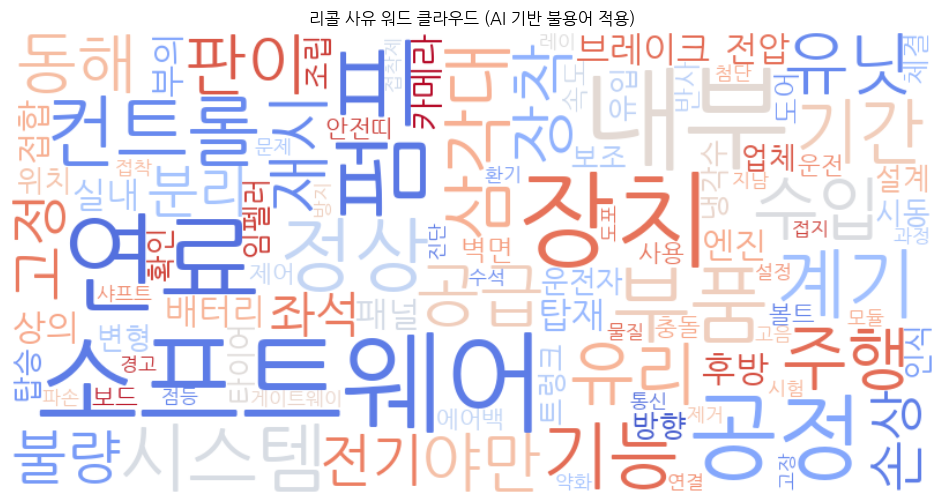

In [26]:
#3 TF-IDF를 이용해 정보량이 적은 단어(불용어 후보)를 자동으로 선정
# 🔹 필요한 라이브러리 설치 (코랩에서 실행)
!pip install wordcloud konlpy scikit-learn

# 🔹 필요한 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# 1️⃣ 리콜 사유 데이터 수집 및 전처리
text_data = df['리콜사유'].dropna().tolist()

# 2️⃣ 형태소 분석기 (Okt) 사용하여 명사 추출
okt = Okt()
tokenized_texts = [' '.join(okt.nouns(text)) for text in text_data]

# 3️⃣ 불용어(stopwords) 기본 리스트 (수동 선정)
manual_stopwords = set([
    '차량', '리콜', '대상', '일부', '해당', '조치', '결함', '위해', '동안', '인하여',
    '있는', '경우', '있습니다', '가능성이', '않을', '가', '에', '설치', '적용', '가능성',
    '발생', '점검', '수리', '교환', '제작', '안내', '자동차', '작동', '오류', '생산', '다시',
    '준수', '제조', '구성', '이로', '상태', '기준공정', '특정', '시간', '국내', '규칙', '오류로', '제대로', '기준', '성능', '충족', '활성화', '안전'])

# 4️⃣ TF-IDF 벡터화 (AI 기반 불용어 선정)
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(tokenized_texts)

# 5️⃣ 단어별 평균 TF-IDF 값 계산
tfidf_scores = np.asarray(tfidf_matrix.mean(axis=0)).flatten()
terms = vectorizer.get_feature_names_out()

# 6️⃣ TF-IDF 값이 낮은 단어(불용어 후보) 상위 100개 추출
low_tfidf_words = sorted(zip(terms, tfidf_scores), key=lambda x: x[1])[:100]
ai_stopwords = set([word for word, score in low_tfidf_words])

# 7️⃣ 최종 불용어 리스트 (수동 + AI 선정)
final_stopwords = manual_stopwords.union(ai_stopwords)

# 8️⃣ 불용어 제거 후 단어 빈도 계산
filtered_tokens = [word for text in tokenized_texts for word in text.split() if word not in final_stopwords and len(word) > 1]
word_counts = Counter(filtered_tokens)

# 9️⃣ 워드 클라우드 생성
wordcloud = WordCloud(
    font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # 한글 폰트 적용
    background_color='white',
    width=800,
    height=400,
    max_words=100,
    stopwords=final_stopwords,
    colormap='coolwarm'
).generate_from_frequencies(word_counts)

# 🔟 워드 클라우드 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("리콜 사유 워드 클라우드 (AI 기반 불용어 적용)")
plt.show()
